<h1>Selected 3 Project</h1>

<h2>there is two phases into this project</h2> 
<h3> phase 1</h3>

**Project Requirements :**<br>
1- Make scrapping on the website and collect data<br>
2- clean the scrapped data<br>
3- auto correct the scrapped data<br>
4- Save your data in csv file "Data sheet" <br>
with the columns like " Author - title - publishing year - link for pdf - etc. "<br>
5- cluster this data for topic modeling<br>
**The website for scrapping : https://www.arab-books.com**

 **importing libraries**

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from itertools import zip_longest
import re
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
import numpy as np

<h2>1- Make scrapping on the website: www.arab-books.com and collect data</h2>

<h3>Request to get all books from the website</h3><br>

there are **200 pages** on the website Each page have on average **30 book**

In [2]:
main_src = []
for i in range(1,201):
  main_src.append(requests.get("https://www.arab-books.com//page/"+str(i)).text)

In [3]:
main_soup = []
for src in main_src:
  main_soup.append(BeautifulSoup(src, 'lxml'))

In [4]:
all_books_src = [] 
for soup in main_soup :
 all_books_src = all_books_src + soup.find_all('li',class_='post-item tie-standard')

In [5]:
all_books_title=[]
for soup in main_soup :
  all_books_title = all_books_title + soup.find_all("div",{"class":"excerpt-book"}) 

In [6]:
all_books_title[0:10]

In [7]:
books_titles=[]
for title in all_books_title :
  books_titles.append(title.text)
len(books_titles)

5984

In [8]:
url_pattern = "http([^\"]+)"
URl_RegEx = re.compile(url_pattern)
Books_urls=[]
for Object in all_books_title :
  myResult = URl_RegEx.search(str(Object))
  Books_urls.append(myResult.group())
Books_urls[:10]

['https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d8%a7%d9%84%d8%aa%d8%b6%d8%ad%d9%8a%d8%a9-%d8%b9%d9%86%d8%af-%d8%a7%d9%84%d8%ad%d9%8a%d9%88%d8%a7%d9%86-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d9%85%d8%b9%d8%ac%d8%b2%d8%a9-%d8%a7%d9%84%d8%b0%d8%b1%d8%a9-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d9%84%d8%a7-%d8%aa%d8%aa%d8%ac%d8%a7%d9%87%d9%84-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d8%a7%d9%84%d8%ad%d9%8a%d8%a7%d8%a9-%d9%81%d9%8a-%d8%b3%d8%a8%d9%8a%d9%84-%d8%a7%d9%84%d9%84%d9%87-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d8%a7%d9%84%d8%b9%d8%b8%d9%85%d8%a9-%d9%81%d9%8a-%d9%83%d9%84-%d9%85%d9%83%d8%a7%d9%86-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d9%85%d8%b9%d8%ac%d8%b2%d8%a9-%d8%a7%d9%84%d8%ac%d9%87%d8%a7%d8%b2-%d8%a7%d9%84%d9%85%d9%86%d8%a7%d8%b9%d9%8a-pdf/',
 'https://www.arab-books.com/books/%d9%83%d8%aa%d8%a7%d8%a8-%d8%a7%d9%84%d8%b1%d9%

In [9]:
len(Books_urls)

5984

We have now the url and title of **5984 books**

<h3>Request to get more information about each book </h3>


In [10]:
i=0
scoup_src = []
for book in Books_urls :
    scoup_src.append(requests.get(book,allow_redirects=False).text)
    i+=1
    if(i%200==0):
        print(len(scoup_src))

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800


In [11]:
scoop_soup = []
for page in scoup_src:
  scoop_soup.append(BeautifulSoup(page, 'lxml'))
len(scoop_soup)

5984

In [12]:
scoop_books_info = [] 
scoop_books_summary=[]
for soop_page in scoop_soup :
    scoop_books_info = scoop_books_info + soop_page.find_all('div',class_="book-info")
    scoop_books_summary = scoop_books_summary + soop_page.find_all('div',class_="entry-content entry clearfix")

In [13]:
scoop_books_info[0]

In [14]:
scoop_books_summary[0]

In [15]:
books_info=[]
for book_info in scoop_books_info:
    new_book_info=[]
    for info in book_info.find_all("li"):
        new_book_info.append(info.text.split(":"))
    books_info.append(new_book_info)

In [16]:
books_info[0]

In [17]:
src_download_url=[]
for book_url in scoop_soup:
  src_download_url = src_download_url + book_url.find_all('div',class_="down-link-bottom")

In [17]:
src_download_url[:5]

In [18]:
Books_download_urls=[]
for src_url in src_download_url :
  myResult = URl_RegEx.search(str(src_url))
  Books_download_urls.append(myResult.group())
Books_download_urls[:10]

In [19]:
books_titles[0]

In [20]:
scoop_books_summary[0]

In [21]:
books_summary=[]
for text in scoop_books_summary:
    books_summary.append(text.find_all('p'))
books_summary

In [22]:
books_summary[0]

In [23]:
Books_download_urls[0]

In [26]:
books_Authors = []
books_Class = []
books_Language=[]
books_Pages =[]
books_publisher=[]
book_Size =[]
book_format =[]
for Book_Info in books_info :
  books_Authors.append(Book_Info[0][1])
  books_Class.append(Book_Info[1][1])
  books_Language.append(Book_Info[2][1])
  books_Pages.append(Book_Info[3][1])
  books_publisher.append(Book_Info[4][1])
  book_Size.append(Book_Info[5][1])
  book_format.append(Book_Info[6][1])

In [24]:
len(book_Size)

**Now we have all information about our 5984 books**<br>

Lets save the data in a csv

In [28]:
data_list=[books_titles,books_Authors,books_summary,books_Class,books_Language,books_Pages,books_publisher,book_Size,book_format,Books_download_urls,Books_urls]
exported=zip_longest(*data_list)

In [29]:
with open("Scrapped_Data.csv","w",encoding="utf-8") as Scrapped_Data:
  wr=csv.writer(Scrapped_Data)
  wr.writerow(["BookTitle","Author","BookSummary","Class","Language","Pages","publisher","BookSize","format","DownloadURL","PageURL"])
  wr.writerows(exported)

<h2>2-Clean Scrapped Data</h2>

In [25]:
#read Scrapped_Dataset to clean it
data=pd.read_csv("Scrapped_Data.csv")
data.head(2)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,\r\nكتاب التضحية عند الحيوان PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...,\r\nتحميل كتب الأدب العربي\r\nتحميل كتب متنوع...,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,\r\nكتاب معجزة الذرة PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...,\r\nتحميل كتب تطوير الذات\r\nتحميل كتب متنوعة...,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [26]:
data.shape

(5984, 11)

In [27]:
data.tail(2)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
5982,\r\nالقران الكريم باللغة الانجليزية -Quran wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arab-books.com/books/%d8%a7%d9%84%...
5983,\r\nLe Saint Coran en français\r\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.arab-books.com/books/le-saint-cora...


In [28]:
#Remove dublicated and null rows
data=data.dropna()
data=data.drop_duplicates()
data.describe()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
count,5898,5898,5898,5898,5898,5898,5898,5898,5898,5898,5898
unique,5792,600,5370,290,21,791,784,1143,11,5898,5898
top,\r\nكتاب نهاية العالم PDF\r\n,\r\nكتب أحمد خالد توفيق\r\n,"[<p><span style=""font-size: 24px; font-weight:...",\r\nتحميل كتب اسلامية\r\n,عربي,1 صفحة,,1 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
freq,3,298,69,1230,3837,133,686,640,4048,1,1


In [29]:
data.head(2)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,\r\nكتاب التضحية عند الحيوان PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...,\r\nتحميل كتب الأدب العربي\r\nتحميل كتب متنوع...,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,\r\nكتاب معجزة الذرة PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...,\r\nتحميل كتب تطوير الذات\r\nتحميل كتب متنوعة...,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [30]:
data[["BookTitle","Author","BookSummary"]].head()

,BookTitle,Author,BookSummary
0,\r\nكتاب التضحية عند الحيوان PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...
1,\r\nكتاب معجزة الذرة PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...
2,\r\nكتاب لا تتجاهل PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...
3,\r\nكتاب الحياة في سبيل الله PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...
4,\r\nكتاب العظمة في كل مكان PDF\r\n,\r\nكتب الكاتب هارون يحيى\r\nكتب الكاتب هارون ...,[<p>الروايات والكتب العربية تعتبر من الروابط ب...


In [31]:
#cleaning our data from any thing except arabic letters
pattern="[^ء-ي ]"
data["BookTitle"].replace(pattern,' ', regex=True,inplace=True)
data["Author"].replace(pattern,' ', regex=True,inplace=True)
data["Class"].replace(pattern,' ', regex=True,inplace=True)
data["BookSummary"].replace(pattern,' ', regex=True,inplace=True)

In [32]:
data["BookTitle"][0]

'  كتاب التضحية عند الحيوان      '

In [33]:
#handle the start and end spaces 
data["BookTitle"]=data["BookTitle"].apply(lambda title:title.strip())
data["BookTitle"][0]

'كتاب التضحية عند الحيوان'

In [34]:
data["Author"][0]

'  كتب الكاتب هارون يحيى  كتب الكاتب هارون يحيى  '

In [35]:
data["Class"][0]

'   تحميل كتب الأدب العربي  تحميل كتب متنوعة  '

In [36]:
data["BookSummary"][0]

'    الروايات والكتب العربية تعتبر من الروابط بيننا وبين تاريخنا كعرب او بيننا وبين اللغة العربية  وبين تاريخنا واحداث هذا التاريخ  الروايات العربية الي الان ومع تقدم العصور والتكنولوجيا لازالت قائمة وحاضرة         كتاب التضحية عند الحيوان للكاتب                                                                                                                                            هارون يحيى      تعتبر صفحات التضحية والتعاون والرحمة والمحبة والتكافل من الأخلاق الحسنة التي يسعى كل مجتمع لنشرها بين أفراده  وهذه الميزات تسبغ على الإنسان الذي يتحلى بها المحبة والاحترام في البيئة التي يعيش فيها  ولعل كل إنسان يسعى إلى أن يحيا وسط مجتمع تنتشر فيه هذه الفضائل        وفي هذا الكتاب وقع تناول هذه الخصال والفضائل بالدرس بيد أن الذي يتصف بالتضحية والإيثار هنا  والذي يقوم بأعمال التعاون والتكافل ويفيض شفقة ومحبة ورحمة ليس كائنا  بشريا   إن الذي نتناوله بالبحث هنا وتجتمع فيه جميع هذه الفضائل هو الحيوان  فثمة حيوانات تلقى نفسها إلى الهلاك والخطر في مواجهة أعدائها من أجل حماية حياة صغارها  وثمة طيو

In [37]:
#remove all this unimportant spaces 
space_patern="[ ]+"
data["BookSummary"].replace(space_patern,' ', regex=True,inplace=True)

In [38]:
data["BookSummary"][0]

' الروايات والكتب العربية تعتبر من الروابط بيننا وبين تاريخنا كعرب او بيننا وبين اللغة العربية وبين تاريخنا واحداث هذا التاريخ الروايات العربية الي الان ومع تقدم العصور والتكنولوجيا لازالت قائمة وحاضرة كتاب التضحية عند الحيوان للكاتب هارون يحيى تعتبر صفحات التضحية والتعاون والرحمة والمحبة والتكافل من الأخلاق الحسنة التي يسعى كل مجتمع لنشرها بين أفراده وهذه الميزات تسبغ على الإنسان الذي يتحلى بها المحبة والاحترام في البيئة التي يعيش فيها ولعل كل إنسان يسعى إلى أن يحيا وسط مجتمع تنتشر فيه هذه الفضائل وفي هذا الكتاب وقع تناول هذه الخصال والفضائل بالدرس بيد أن الذي يتصف بالتضحية والإيثار هنا والذي يقوم بأعمال التعاون والتكافل ويفيض شفقة ومحبة ورحمة ليس كائنا بشريا إن الذي نتناوله بالبحث هنا وتجتمع فيه جميع هذه الفضائل هو الحيوان فثمة حيوانات تلقى نفسها إلى الهلاك والخطر في مواجهة أعدائها من أجل حماية حياة صغارها وثمة طيور تعرض نفسها للخطر أيضا من أجل حماية فراخها وفي مناطق القطب المتجمد تمكث طيور البطريق لأشهر دون أكل ودون حركة حتى توفر الحرارة والدفء لفراخها ونجد كذلك حيوانات تتحمل مسؤولي

In [39]:
#remove redundant words unusefal 
data["BookTitle"].replace(r"كتاب","",regex=True,inplace=True)
data["Author"].replace(r"الكاتب","",regex=True,inplace=True)
data["Class"].replace(r"كتب","",regex=True,inplace=True)

In [40]:
data[["BookTitle","Author","BookSummary","Class"]].head()

,BookTitle,Author,BookSummary,Class
0,التضحية عند الحيوان,كتب هارون يحيى كتب هارون يحيى,الروايات والكتب العربية تعتبر من الروابط بينن...,تحميل الأدب العربي تحميل متنوعة
1,معجزة الذرة,كتب هارون يحيى كتب هارون يحيى,الروايات والكتب العربية تعتبر من الروابط بينن...,تحميل تطوير الذات تحميل متنوعة
2,لا تتجاهل,كتب هارون يحيى كتب هارون يحيى,الروايات والكتب العربية تعتبر من الروابط بينن...,تحميل الأدب العربي
3,الحياة في سبيل الله,كتب هارون يحيى كتب هارون يحيى,الروايات والكتب العربية تعتبر من الروابط بينن...,تحميل اسلامية
4,العظمة في كل مكان,كتب هارون يحيى كتب هارون يحيى,الروايات والكتب العربية تعتبر من الروابط بينن...,تحميل الأدب العربي


In [41]:
#cleaning from redundant words unusefal 
data["Class"]=data["Class"].apply(lambda text:text.replace("تحميل","",1))
data["Author"]=data["Author"].apply(lambda text:text.replace("كتب","",1))
#split Classes into multiclass & split Authers too
data["Class"]=data["Class"].apply(lambda row:row.split("تحميل"))
data["Author"]=data["Author"].apply(lambda row:row.split("كتب"))

In [42]:
data[["BookTitle","Author","BookSummary","Class"]].head()

,BookTitle,Author,BookSummary,Class
0,التضحية عند الحيوان,"[ هارون يحيى , هارون يحيى ]",الروايات والكتب العربية تعتبر من الروابط بينن...,"[ الأدب العربي , متنوعة ]"
1,معجزة الذرة,"[ هارون يحيى , هارون يحيى ]",الروايات والكتب العربية تعتبر من الروابط بينن...,"[ تطوير الذات , متنوعة ]"
2,لا تتجاهل,"[ هارون يحيى , هارون يحيى ]",الروايات والكتب العربية تعتبر من الروابط بينن...,[ الأدب العربي ]
3,الحياة في سبيل الله,"[ هارون يحيى , هارون يحيى ]",الروايات والكتب العربية تعتبر من الروابط بينن...,[ اسلامية ]
4,العظمة في كل مكان,"[ هارون يحيى , هارون يحيى ]",الروايات والكتب العربية تعتبر من الروابط بينن...,[ الأدب العربي ]


In [43]:
data["Author"][0]

['    هارون يحيى  ', '  هارون يحيى  ']

In [44]:
#handle the start and end spaces 
data["Author"]=data["Author"].apply(lambda Authorlist:[Author.strip() for Author in Authorlist])
data["Author"][0]

['هارون يحيى', 'هارون يحيى']

In [45]:
data["Class"][0]

['     الأدب العربي  ', '  متنوعة  ']

In [46]:
#handle the start and end spaces 
data["Class"]= data["Class"].apply(lambda classlist:[myclass.strip() for myclass in classlist])
data["Class"][0]

['الأدب العربي', 'متنوعة']

In [47]:
#delete all dublicated values
data["Author"]=data["Author"].apply(lambda Authorlist:list(set(Authorlist)))
data["Class"] = data["Class"].apply(lambda classlist: (list(set(classlist))))

In [48]:
data.head(3)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[الأدب العربي, متنوعة]",عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[متنوعة, تطوير الذات]",عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,[الأدب العربي],عربي,100 صفحة,عدنان أوكطار,3 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [49]:
data["format"].unique()

array([' pdf', ' ', ' excel', ' word', ' PDF', ' 15.11', ' Pdf', ' حيب',
       ' P', ' PDF ZIP', ' PDf'], dtype=object)

In [50]:
data[data["format"]==' 15.11']

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
3936,أحكام الأضحية والزكاة,[الشيخ محمد بن صالح العثيمين],كتاب زاد الداعية إلى الله للشيخ العلامة محمد ...,[العقيدة],العربية,34 صفحة,دار الثريا,15.11 ميغابايت,15.11,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [51]:
#cleaning
PDF=[" pdf"," PDF"," Pdf"," P"," PDF ZIP"," PDf"," حيب"," "," 15.11"]
data["format"].replace(PDF,"PDF",inplace=True)

In [52]:
data["format"].unique()

array(['PDF', ' excel', ' word'], dtype=object)

In [53]:
data["Language"].unique()

array([' عربي', ' ', ' إنجليزي', ' العربية', ' العربيه', ' العريبة',
       ' اللغة العربية', ' الإنجليزية', ' English', ' الانجليزية',
       ' الألمانية', ' عربية - المانية', ' العربية - الألمانية',
       ' العربية - الالمانية', ' اللعة العربية', ' اللغه العربية',
       ' اللغه العربيه', ' العرببة', ' العريبية', ' الللغة العربية',
       ' العربيىة'], dtype=object)

In [54]:
Arabic=[' عربي', ' ', ' العربية', ' العربيه', ' العريبة',' اللغة العربية',' عربية - المانية', ' العربية - الألمانية',' العربية - الالمانية', ' اللعة العربية', ' اللغه العربية',' اللغه العربيه', ' العرببة', ' العريبية', ' الللغة العربية',' العربيىة']
English=[' إنجليزي', ' الإنجليزية', ' English',' الانجليزية']
German=' الألمانية'

In [55]:
#cleaning
data["Language"].replace(Arabic,"اللغة العربية",inplace=True)
data["Language"].replace(English,"اللغة الانجليزية",inplace=True)
data["Language"].replace(German,"اللغة الألمانية",inplace=True)
data["Language"].unique()

array(['اللغة العربية', 'اللغة الانجليزية', 'اللغة الألمانية'],
      dtype=object)

In [56]:
data[["BookTitle","Author","BookSummary","Class"]].head()

,BookTitle,Author,BookSummary,Class
0,التضحية عند الحيوان,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[الأدب العربي, متنوعة]"
1,معجزة الذرة,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[متنوعة, تطوير الذات]"
2,لا تتجاهل,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,[الأدب العربي]
3,الحياة في سبيل الله,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,[اسلامية]
4,العظمة في كل مكان,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,[الأدب العربي]


In [63]:
Authors=[]
for Author in data["Author"]:
    if len(Author)==1:
        Authors.append(Author)
Authors[10:15]

[['محمود سالم'],
 ['محمود سالم'],
 ['محمود سالم'],
 ['هارون يحيى'],
 ['هارون يحيى']]

In [64]:
Authors=[]
for Author in data["Author"]:
    if len(Author)>1:
        Authors.append(Author)
Authors[10:15]

[['', 'الدكتور سليم حسن'],
 ['', 'الدكتور سليم حسن'],
 ['', 'الدكتور سليم حسن'],
 ['', 'الدكتور سليم حسن'],
 ['', 'الدكتور سليم حسن']]

In [65]:
#cleaning the column from fake values
data["Author"]= data["Author"].apply(lambda x:[item for item in x if item not in ['']])

In [66]:
Authors=[]
for Author in data["Author"]:
    if len(Author)>1:
        Authors.append(Author)
Authors[10:15]

[['كوثر محمود عبد الرسول', 'محمد رياض'],
 ['ابن جزي الكلبي', 'ابن بطوطة'],
 ['جايا جرانت', 'أندرو جرانت'],
 ['تشستر إلتون', 'أدريان جوستيك'],
 ['بيتر سي كايرو', 'ديفيد إل دوتليتش', 'ستيفن إتش راينسميث']]

In [69]:
classs=[]
for bookclass in data["Class"]:
    if len(bookclass)==1:
        classs.append(bookclass)
classs[10:15]

[['الأدب العربي'], ['اسلامية'], ['الفلسفة والمنطق'], ['اسلامية'], ['اسلامية']]

In [74]:
classs=[]
for bookclass in data["Class"]:
    if len(bookclass)>1:
        classs.append(bookclass)
classs[150:155]

[['الأدب العربي', 'روايات عربية', 'الروايات العالمية المترجمة'],
 ['الأدب العربي', 'روايات عربية', 'الروايات العالمية المترجمة'],
 ['الأدب العربي', 'روايات عربية', 'الروايات العالمية المترجمة'],
 ['الأدب العربي', 'روايات عربية', 'الروايات العالمية المترجمة'],
 ['الأدب العربي', 'روايات عربية', 'الروايات العالمية المترجمة']]

In [75]:
#cleaning the column from fake values
data["Class"]= data["Class"].apply(lambda x:[item for item in x if item not in ['']])

In [76]:
data.head(3)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,"[متنوعة, تطوير الذات]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],الروايات والكتب العربية تعتبر من الروابط بينن...,[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


**now our dataset is clean <br>
lets save it in CSV**

In [77]:
data.to_csv("CleanScrappedDataset.csv")
data.to_json("CleanScrappedDataset.json")

<h2>3-auto correct the scrapped data</h2>

**3.1-Auto contextual_correct**

In [78]:
from ar_corrector.corrector import Corrector
corr = Corrector()

In [79]:
dataset=pd.read_json("CleanScrappedDataset.json")

In [80]:
#lenth befor context correction
len(dataset["BookSummary"][0])

2831

In [81]:
#len after context correction
len(dataset["BookSummary"].iloc[0:1].apply(lambda row:corr.contextual_correct(row))[0])

2824

we notice the diferrent betwen two lengths<br>
lets apply to all data 

In [82]:
#context correction this take too time 
dataset["BookSummary"]= dataset["BookSummary"].apply(lambda row:corr.contextual_correct(row))

**Tokenization to make Auto correction on words**

In [84]:
dataset['BookSummary'] = dataset.apply(lambda row: nltk.word_tokenize(row['BookSummary']), axis=1)

In [86]:
dataset["BookSummary"].iloc[0][:10]

['الروايات',
 'والكتب',
 'العربية',
 'تعتبر',
 'من',
 'الروابط',
 'بيننا',
 'وبين',
 'تاريخنا',
 'كعرب']

**3.2-Auto word correct the scrapped data**

In [88]:
dataset.head(3)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],"[الروايات, والكتب, العربية, تعتبر, من, الروابط...","[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],"[الروايات, والكتب, العربية, تعتبر, من, الروابط...","[متنوعة, تطوير الذات]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],"[الروايات, والكتب, العربية, تعتبر, من, الروابط...",[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [89]:
check=lambda word : type(corr.spell_correct(word,1)) is type([])
get =lambda word : corr.spell_correct(word,1)[0][0]

In [90]:
#this take alot of time to correct all words
dataset["BookSummary"]=dataset["BookSummary"].apply(lambda row: [get(word) if check(word) else word for word in row])

**Remove Aabic Stop words**

In [92]:
import arabicstopwords.arabicstopwords as stp
stp.classed_stopwords_list()

dict_keys(['حم', 'غداة', 'جنوب', 'ذواتا', 'حي', 'لازلنا', 'زمان', 'عوض', 'بنا', 'أجمع', 'ؤ', 'إيه', 'لدن', 'ها', 'ش', 'غرب', 'لازلتم', 'هج', 'هب', 'عسى', 'ل', 'آنفا', 'لازلتن', 'هن', 'هم', 'هل', 'هاؤم', 'ارتد', 'هي', 'هو', 'لازالتا', 'تلكما', 'وقت', 'أولئكم', 'نحو', 'حسب', 'نحن', 'لئن', 'اللذين', 'أب', 'أخ', 'قبل', 'بدون', 'مادامتا', 'بئس', 'د', 'ذا', 'لعمر', 'هاهنا', 'كما', 'لستم', 'لستن', 'حتى', 'لدى', 'ذه', 'ذي', 'ذو', 'أي', 'أو', 'أف', 'أن', 'أم', 'نعما', 'هيت', 'هيا', 'مابرح', 'حينما', 'هلا', 'إنما', 'جعل', 'كخ', 'ت', 'عما', 'بكن', 'بكم', 'مازلنا', 'غ', 'رويدك', 'دون', 'أولئك', 'كي', 'هؤلاء', 'لها', 'ي', 'مكانكما', 'كم', 'كل', 'مافتئتن', 'ماانفككتما', 'لعل', 'إنا', 'لازال', 'متى', 'مابرحوا', 'خلال', 'مازلتن', 'مازلتم', 'ثنا', 'راح', 'هلم', 'لولا', 'مابرحتما', 'مافتئت', 'مافتئتم', 'تان', 'مرة', 'أصلا', 'وشكان', 'كأنما', 'إياهما', 'أسفل', 'ص', 'أمامك', 'م', 'مادمتما', 'إياهم', 'ماانفكوا', 'استحال', 'إليك', 'أمسى', 'انبرى', 'مافتئتا', 'أنتم', 'لازالوا', 'أنتن', 'ليستا', 'ماانفككن', '

In [93]:
#remove stop words
dataset['BookSummary'] = dataset['BookSummary'].apply(lambda row: [word for word in row if not stp.is_stop(word)])

In [94]:
dataset[['BookTitle','Author','Class',"BookSummary"]].head()

,BookTitle,Author,Class,BookSummary
0,التضحية عند الحيوان,[هارون يحيى],"[الأدب العربي, متنوعة]","[الروايات, والكتب, العربية, تعتبر, الروابط, تا..."
1,معجزة الذرة,[هارون يحيى],"[متنوعة, تطوير الذات]","[الروايات, والكتب, العربية, تعتبر, الروابط, تا..."
2,لا تتجاهل,[هارون يحيى],[الأدب العربي],"[الروايات, والكتب, العربية, تعتبر, الروابط, تا..."
3,الحياة في سبيل الله,[هارون يحيى],[اسلامية],"[الروايات, والكتب, العربية, تعتبر, الروابط, تا..."
4,العظمة في كل مكان,[هارون يحيى],[الأدب العربي],"[الروايات, والكتب, العربية, تعتبر, الروابط, تا..."


**Stemming**

In [95]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

In [96]:
dataset['BookSummary']=dataset['BookSummary'].apply(lambda x: [st.stem(item) for item in x])

In [97]:
dataset['BookSummary'].iloc[0][:10]

['روي', 'كتب', 'عرب', 'عبر', 'ربط', 'ارخ', 'كعرب', 'او', 'لغة', 'عرب']

In [99]:
dataset.head(3)

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[متنوعة, تطوير الذات]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


<h2>4-Save your data in csv file "Data sheet" </h2><br>
with the following columns " Author - title - publishing year - link for pdf - etc. "

In [100]:
dataset.to_csv("finalCleanedData.csv",header=True)

**Save your data in json file to save our lists as it is**

In [101]:
dataset.to_json("finalCleanedData.csv")

<h2>5-Cluster this data for topic modeling</h2>

In [102]:
mydata=pd.read_json("finalCleanedData.csv")

In [103]:
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[متنوعة, تطوير الذات]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[اسلامية],اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [104]:
#clustering by BookSummary base
mydata=mydata[["BookTitle","Author","BookSummary"]]
mydata.head()

,BookTitle,Author,BookSummary
0,التضحية عند الحيوان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ..."
1,معجزة الذرة,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ..."
2,لا تتجاهل,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ..."
3,الحياة في سبيل الله,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ..."
4,العظمة في كل مكان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ..."


In [105]:
mydata["BookSummary"][0][:10]

['روي', 'كتب', 'عرب', 'عبر', 'ربط', 'ارخ', 'كعرب', 'او', 'لغة', 'عرب']

In [106]:
mydata["BookSummary"]=mydata["BookSummary"].apply(lambda row: ' '.join(row))

In [107]:
mydata["BookSummary"][0]

'روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حدث ارخ روي عرب الي الن قدم عصر كنولوج قئم حضر كتب ضحي حيو كتب هار يحى عبر صفح ضحي تعا رحم حبة كفل خلق حسن سعى جمع نشر فرد ميز سبغ انس حلى حبة حرم بيئ يعش انس سعى يحا وسط جمع نشر فضل كتب وقع نول خصل فضل درس تصف ضحي يثر يقم أعمال تعا كفل يفض شفق محب رحم كائ بشر نول بحث جمع فضل حيو حيو لقى هلك خطر وجه عدئ حمي حية صغر طير عرض خطر حمي فرخ نطق قطب تجمد مكث طير طرق أشهر حرك وفر حرر دفء فرخ نجد حيو حمل سؤل رعي قطع سبل صغر حيو وبق يتي نجد مثل اذج كثر كثر كتب ضحي حيو عدن كطر عرف بسم هار يحى كتب بحث ترك سلم ولد نقر عام وعش عام نقل لإسطنبول تحق بكل فنن جمل جمع عمر سنن سنا جمع بحث فصل لسف ادة ايديولوجية سئد تحط إنشاء ؤسس بحث علم ترك ركز كتب فند كذب نظر تطر رقء نشء وبي نقض رأه ركز كتب وضع اسن صهو لحد مئة كتب قيم أخلاق قرأ مواضيع يمن عدد خلف رجم عدد لغت علم وسم قلم هار يحى شهر كتب كتب طلس خلق يقع صفح حدث رفض نظر نشء رقء درو شهر ؤلف طلس خلق نهي درن عجز لذر عجز خلق نبت خلق كون مفاهيم سسي قرآ فكر حقق كرث جلب داروينية سان عجز نمل عجز نحل عجز جهز نعي عمل عدن ك

In [108]:
mydata.head()

,BookTitle,Author,BookSummary
0,التضحية عند الحيوان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...
1,معجزة الذرة,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...
2,لا تتجاهل,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...
3,الحياة في سبيل الله,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...
4,العظمة في كل مكان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...


<h3>kmean clustering using CountVectorizer<h3>

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(mydata['BookSummary'].values)
bow

<5898x15872 sparse matrix of type '<class 'numpy.int64'>'
	with 663630 stored elements in Compressed Sparse Row format>

In [110]:
terms = count_vect.get_feature_names()

In [113]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 20,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=20, random_state=99)

In [114]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [115]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00355872, 0.00355872, 0.00355872, ..., 0.        , 0.        ,
        0.        ]])

In [116]:
terms[1:10]

['ءات', 'ءاتنـ', 'ءاذ', 'ءام', 'ءامنـ', 'ءة', 'ءله', 'ءمر', 'ءمن']

In [117]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [118]:
# which tells us that clusters are far away from each other 
silhouette_score

0.18003436494177047

In [119]:
# Giving Labels/assigning a cluster to each point/text 
mydata['Bow Class Labal'] = model.labels_ # the last column you can see the label numebers
mydata.head(2)

,BookTitle,Author,BookSummary,Bow Class Labal
0,التضحية عند الحيوان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9
1,معجزة الذرة,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9


In [120]:
mydata.groupby(['Bow Class Labal'])['BookSummary'].count()

Bow Class Labal
0       64
1      430
2       17
3       33
4       16
5      151
6       84
7     2321
8       96
9      961
10     287
11      62
12     223
13     194
14     110
15     197
16     116
17      28
18     227
19     281
Name: BookSummary, dtype: int64

In [124]:
#Refrence credit - to find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(20):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s-' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: كتب- انس- نصر- لسف- الي- حفظ- عرب- قال- ولد- ادب-
Cluster 1: روي- كتب- عرب- ادب- شهر- حمد- حفظ- بدي- خلد- وفق-
Cluster 2: ون- ين- ال- لل- ان- يم- اب- لر- ور- يه-
Cluster 3: كتب- قطب- سيد- سلم- فكر- رحل- ادب- جمع- شهد- اخو-
Cluster 4: لل- ين- ون- يم- ان- ام- ال- ول- اب- يل-
Cluster 5: سلم- كتب- فكر- حمد- عمر- دكتور- علم- انه- جمع- حدث-
Cluster 6: علم- كتب- نفس- درس- عام- بشر- رود- عقل- عرف- جمع-
Cluster 7: كتب- علم- قرء- حمل- حمد- جمع- سلم- عام- يمك- عمل-
Cluster 8: كتب- عرب- عام- الل- ارخ- حمد- روي- رسل- قصص- سلم-
Cluster 9: كتب- عرب- ارخ- علم- عام- جمع- سلم- روي- حمد- درس-
Cluster 10: كتب- سلم- حدث- جمع- حمد- علم- الل- كثر- دمشق- عبد-
Cluster 11: حكم- كتب- سرح- وفق- حيت- شهر- ادب- دبي- عمل- كانت-
Cluster 12: يكي- عدد- ومك- طفل- لتر- ديز- بطط- كتب- تحر- جال-
Cluster 13: كتب- دين- علم- جلل- سيط- علماء- حفظ- طلب- فسر- كثر-
Cluster 14: كتب- شيخ- قرضاو- سلم- وسف- علم- حصل- تمك- سنة- عصر-
Cluster 15: رمض- يوم- شهر- سلم- مسك- بدأ- فطر- وقت- وفق- رؤة-
Cluster

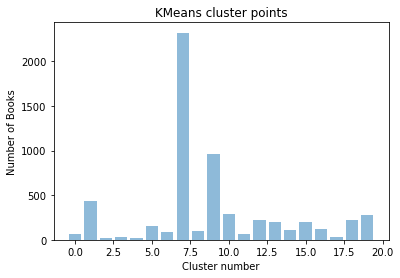

In [132]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(20)], mydata.groupby(['Bow Class Labal'])['BookSummary'].count(), alpha = 0.5)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of Books")
plt.show()

**kmean clustering using TF-IDF** 

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(mydata['BookSummary'].values)
tfidf.shape

(5898, 15872)

In [129]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 20,random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=20, random_state=99)

In [130]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [131]:
cluster_center_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [134]:
terms1[1:10]

['ءات', 'ءاتنـ', 'ءاذ', 'ءام', 'ءامنـ', 'ءة', 'ءله', 'ءمر', 'ءمن']

In [135]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [136]:
silhouette_score_tf

0.14474513124824395

In [137]:
mydata1 = mydata
mydata1['TF-IDF class label'] = model_tf.labels_
mydata1.head(5)

,BookTitle,Author,BookSummary,Bow Class Labal,TF-IDF class label
0,التضحية عند الحيوان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9,3
1,معجزة الذرة,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9,3
2,لا تتجاهل,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9,3
3,الحياة في سبيل الله,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9,3
4,العظمة في كل مكان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,9,3


In [138]:
# How many points belong to each cluster ->

mydata1.groupby(['TF-IDF class label'])['BookSummary'].count()

TF-IDF class label
0      119
1      369
2      116
3     2332
4       79
5      293
6      224
7       62
8      288
9       96
10     194
11     131
12      98
13     100
14     141
15     147
16      36
17     627
18     248
19     198
Name: BookSummary, dtype: int64

In [139]:
#Refrence credit - to find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(20):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s-' % terms1[ind], end='')
    print()

Top terms per cluster:
Cluster 0: دمشق- يمي- فتى- سنة- بلغ- عصر- تقي- شيخ- حنبل- جمع-
Cluster 1: روي- خلد- بدي- ادب- وفق- كتب- عرب- لسل- نجب- الك-
Cluster 2: غزل- طوس- صوف- هـ- حمد- اسماعيلي- شفع- علم- فقه- مات-
Cluster 3: كتب- علم- سلم- حمد- روي- الل- جمع- ارخ- قرأ- شيخ-
Cluster 4: كتب- فقي- راهيم- حسن- ندي- كبت- كند- ندق- لخص- عرب-
Cluster 5: دكتور- نبل- سلم- فكر- فرق- لطب- كتب- عمر- عام- انه-
Cluster 6: يكي- ديز- ومك- لتر- بطط- تحر- طفل- كة- رسم- جال-
Cluster 7: سرح- حكم- وفق- درا- حيت- دبي- بصف- كتب- ثوب- قلد-
Cluster 8: لغز- ختخ- حمد- سحل- برا- لسل- كتب- سلم- حرب- اسكندرية-
Cluster 9: الب- حدث- نبي- ضعف- صحح- حاديث- كتب- امم- نصر- حمد-
Cluster 10: جلل- سيط- دين- كتب- علم- فسر- علماء- طلب- حفظ- اعت-
Cluster 11: ين- ون- حنبل- لل- اب- ذهب- جهد- يم- وب- هـ-
Cluster 12: فى- وسع- سلم- أحكام- نبي- عجز- ليل- صلى- فقه- وقع-
Cluster 13: صلب- كتب- عقد- حرب- ارخ- زكر- عبس- عضو- وهى- حدث-
Cluster 14: يمك- حمل- قرء- وكل- قلب- ثعب- ياب- كتب- عمل- عجز-
Cluster 15: نفس- علم- كتب- انس- درس- نصر- رو

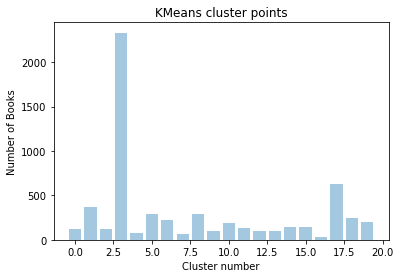

In [140]:
# visually how points or reviews are distributed across 10 clusters 

plt.bar([x for x in range(20)], mydata1.groupby(['TF-IDF class label'])['BookSummary'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of Books")
plt.show()